In [41]:
import pandas as pd
# Load json_normalize()
from pandas import json_normalize
import json

In [42]:
data = pd.read_csv(r'./data/tmdb_5000_movies.csv')
display(data)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [43]:
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [44]:
data.set_index('id', inplace=True)

In [45]:
data = data.sort_index()
display(data)

,budget,genres,homepage,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,
5,4000000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 35, ""name...",NaN,"[{""id"": 612, ""name"": ""hotel""}, {""id"": 613, ""na...",en,Four Rooms,It's Ted the Bellhop's first night on the job....,22.876230,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1995-12-09,4300000,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,530
11,11000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://www.starwars.com/films/star-wars-episod...,"[{""id"": 803, ""name"": ""android""}, {""id"": 4270, ...",en,Star Wars,Princess Leia is captured and held hostage by ...,126.393695,"[{""name"": ""Lucasfilm"", ""id"": 1}, {""name"": ""Twe...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1977-05-25,775398007,121.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"A long time ago in a galaxy far, far away...",Star Wars,8.1,6624
12,94000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://movies.disney.com/finding-nemo,"[{""id"": 494, ""name"": ""father son relationship""...",en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",85.688789,"[{""name"": ""Pixar Animation Studios"", ""id"": 3}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-05-30,940335536,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,6122
13,55000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",NaN,"[{""id"": 422, ""name"": ""vietnam veteran""}, {""id""...",en,Forrest Gump,A man with a low IQ has accomplished great thi...,138.133331,"[{""name"": ""Paramount Pictures"", ""id"": 4}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-07-06,677945399,142.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"The world will never be the same, once you've ...",Forrest Gump,8.2,7927
14,15000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.dreamworks.com/ab/,"[{""id"": 255, ""name"": ""male nudity""}, {""id"": 29...",en,American Beauty,"Lester Burnham, a depressed suburban father in...",80.878605,"[{""name"": ""DreamWorks SKG"", ""id"": 27}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1999-09-15,356296601,122.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Look closer.,American Beauty,7.9,3313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426067,0,"[{""id"": 27, ""name"": ""Horror""}]",NaN,[],en,Midnight Cabaret,A Broadway producer puts on a play with a Devi...,0.001389,[],[],1990-01-01,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The hot spot where Satan's waitin'.,Midnight Cabaret,0.0,0
426469,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",http://www.growingupsmithmovie.com,[],en,Growing Up Smith,"In 1979, an Indian family moves to America wit...",0.710870,[],[],2017-02-03,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,It’s better to stand out than to fit in.,Growing Up Smith,7.4,7
433715,0,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 18, ""n...",NaN,"[{""id"": 10060, ""name"": ""christian film""}, {""id...",en,8 Days,"After sneaking to a party with her friends, 16...",0.015295,"[{""name"": ""After Eden Pictures"", ""id"": 85248}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2014-06-15,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,She never knew it could happen to her...,8 Days,0.0,0


In [46]:
data.isna().sum()

#borrar NaN de release_date
data = data.dropna(subset=['release_date'])

#borrar NaN de runtime
data = data.dropna(subset=['runtime'])

# Reemplazar NaN por 'No disponble"
columnas_noDisponibles = {'homepage': 'No disponible', 'tagline': 'No disponible', 'overview': 'No disponible'}
data = data.fillna(columnas_noDisponibles)

data.isna().sum()

budget                  0
genres                  0
homepage                0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [47]:
# cambiar release_adte a datetime
data['release_date'] = pd.to_datetime(data['release_date'])
print(data.dtypes)

budget                           int64
genres                          object
homepage                        object
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object


In [71]:
# Definir la función para extraer los géneros
def extraer_generos(json_list) -> list:
    nombres = []
    for json in json_list:
        nombres.append(json['name'])
    return nombres

# JSON de ejemplo
data['genres'] = data['genres'].apply(lambda x: extraer_generos(x))
display(data['genres'])

id
5                                         [Crime, Comedy]
11                   [Adventure, Action, Science Fiction]
12                                    [Animation, Family]
13                               [Comedy, Drama, Romance]
14                                                [Drama]
                               ...                       
417859    [Action, Adventure, Animation, Family, Fantasy]
426067                                           [Horror]
426469                            [Comedy, Family, Drama]
433715                                  [Thriller, Drama]
447027                                           [Family]
Name: genres, Length: 4800, dtype: object

In [52]:
import json

# Verificar y convertir la columna JSON de tipo string a tipo lista de diccionarios
data['genres'] = data['genres'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Extraer todos los nombres de géneros en una lista para cada fila
data['genre_names'] = data['genres'].apply(lambda x: [genre['name'] for genre in x] if x else [])

print(data[['genre_names']])

                                            genre_names
id                                                     
5                                       [Crime, Comedy]
11                 [Adventure, Action, Science Fiction]
12                                  [Animation, Family]
13                             [Comedy, Drama, Romance]
14                                              [Drama]
...                                                 ...
417859  [Action, Adventure, Animation, Family, Fantasy]
426067                                         [Horror]
426469                          [Comedy, Family, Drama]
433715                                [Thriller, Drama]
447027                                         [Family]

[4800 rows x 1 columns]


In [73]:
data.rename({'id':'movie_id'})
data.columns

Index(['budget', 'genres', 'homepage', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'nombre_generos', 'genre_names', 'year', 'company_names'],
      dtype='object')

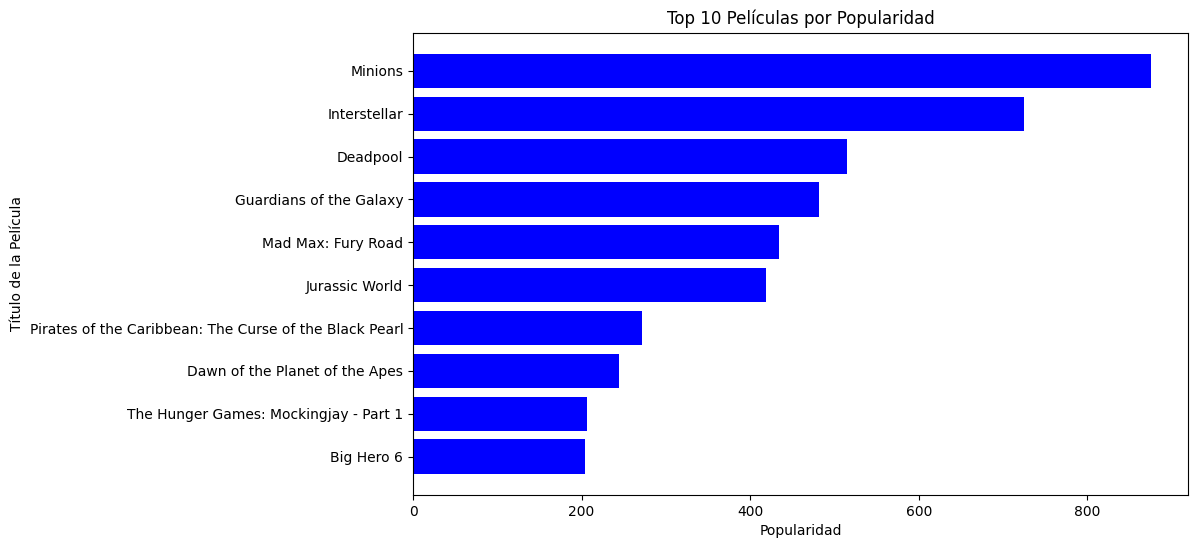

In [53]:
import matplotlib.pyplot as plt

#Gráfico del Histograma de Datos
# Ordenamos el DataFrame por la columna 'popularity' en orden descendente.
df_sorted = data.sort_values(by='popularity', ascending=False)

# Seleccionamos las top 10 películas más populares. 
# En este ejemplo usamos solo 3 para simplificar, pero el método es escalable.
top_movies = df_sorted.head(10)

# Crear un gráfico de barras con los títulos de las películas en el eje x y la popularidad en el eje y.
plt.figure(figsize=(10, 6))
plt.barh(top_movies['original_title'], top_movies['popularity'], color='blue')
plt.xlabel('Popularidad')
plt.ylabel('Título de la Película')
plt.title('Top 10 Películas por Popularidad')
plt.gca().invert_yaxis()  # Invertir el eje y para que la película más popular esté arriba
plt.show()

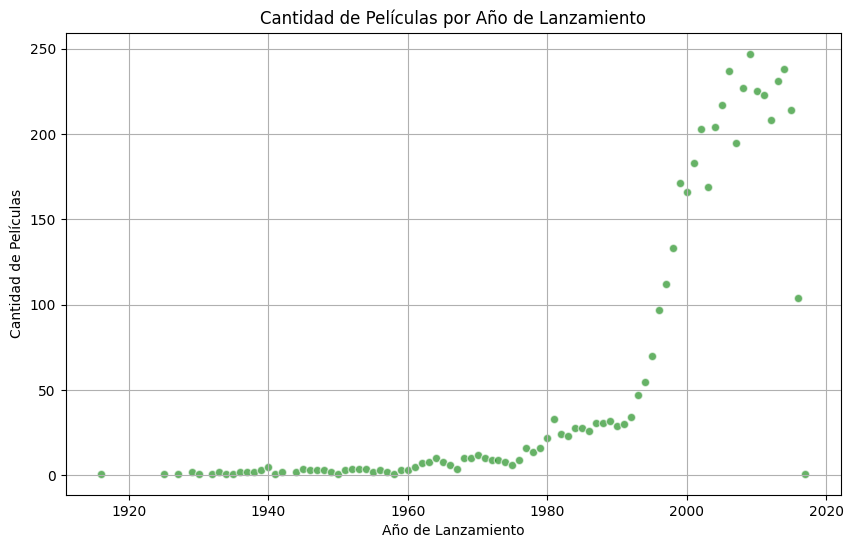

In [54]:
# Extraer el año de la fecha de lanzamiento
data['year'] = data['release_date'].dt.year

# Contar cuántas películas hay por año
movies_per_year = data.groupby('year').size()

# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(movies_per_year.index, movies_per_year.values, color='green', alpha=0.6, edgecolors='w')
plt.title('Cantidad de Películas por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Películas')
plt.grid(True)
plt.show()

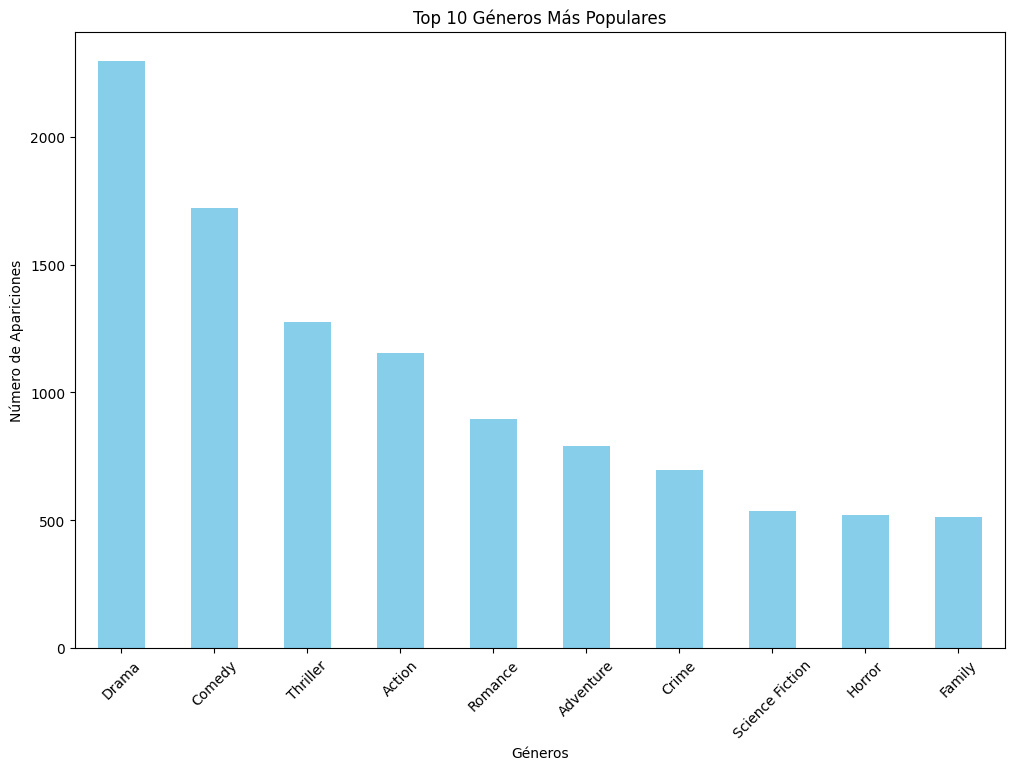

In [55]:
# Convertir JSON a lista de diccionarios si aún no está hecho
data['genres'] = data['genres'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Extraer todos los nombres de géneros en una lista para cada fila
data['genre_names'] = data['genres'].apply(lambda x: [genre['name'] for genre in x] if x else [])

# Ahora extraer y contar las ocurrencias de cada género
genre_counts = pd.Series([genre for sublist in data['genre_names'] for genre in sublist]).value_counts()

# Seleccionar los top 10 géneros más populares
top_genres = genre_counts.head(10)

# Crear un gráfico de barras para los top 10 géneros
plt.figure(figsize=(12, 8))
top_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 Géneros Más Populares')
plt.xlabel('Géneros')
plt.ylabel('Número de Apariciones')
plt.xticks(rotation=45)  # Rota los nombres de géneros para mejor visualización
plt.show()


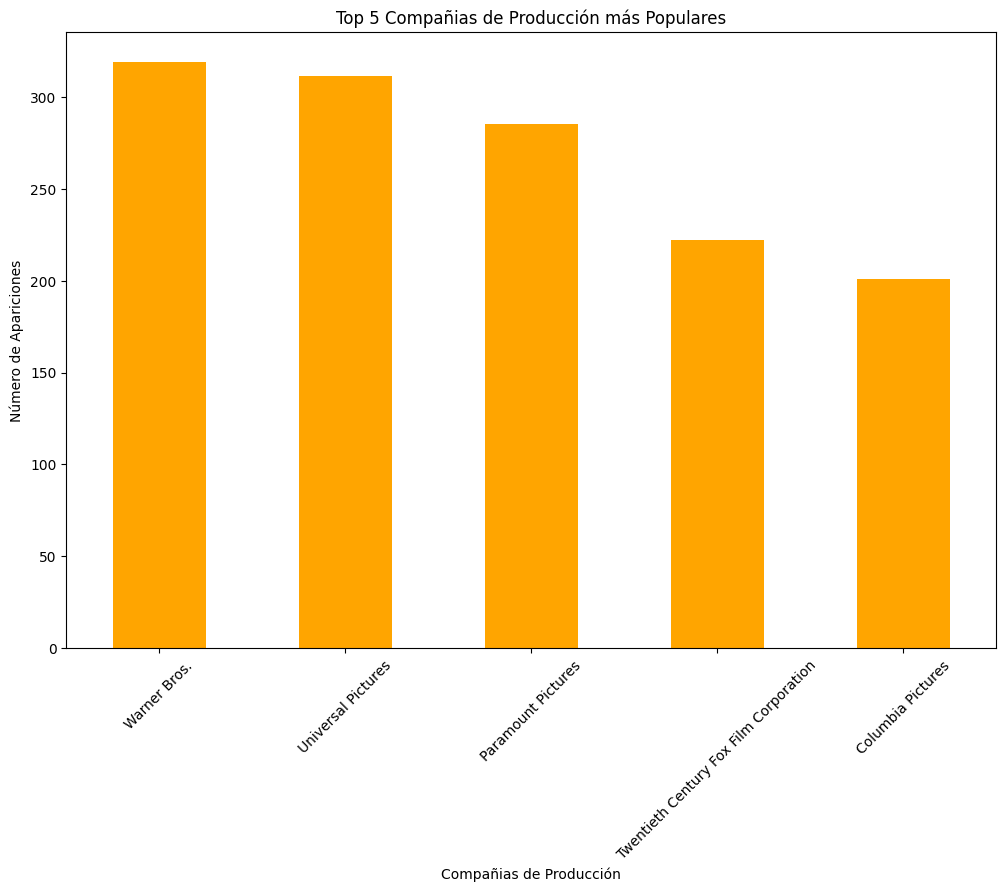

In [56]:

# Verificar y convertir la columna JSON de tipo string a tipo lista de diccionarios
data['production_companies'] = data['production_companies'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

# Extraer todos los nombres de las compañías de producción en una lista para cada fila
data['company_names'] = data['production_companies'].apply(lambda x: [company['name'] for company in x] if x else [])

#print(data[['company_names']])


# Ahora extraer y contar las ocurrencias de cada género
company_counts = pd.Series([company for sublist in data['company_names'] for company in sublist]).value_counts()

# Seleccionar los top 10 géneros más populares
top_companies = company_counts.head(5)

# Crear un gráfico de barras para los top 10 géneros
plt.figure(figsize=(12, 8))
top_companies.plot(kind='bar', color='orange')
plt.title('Top 5 Compañias de Producción más Populares')
plt.xlabel('Compañias de Producción')
plt.ylabel('Número de Apariciones')
plt.xticks(rotation=45)  # Rota los nombres de géneros para mejor visualización
plt.show()






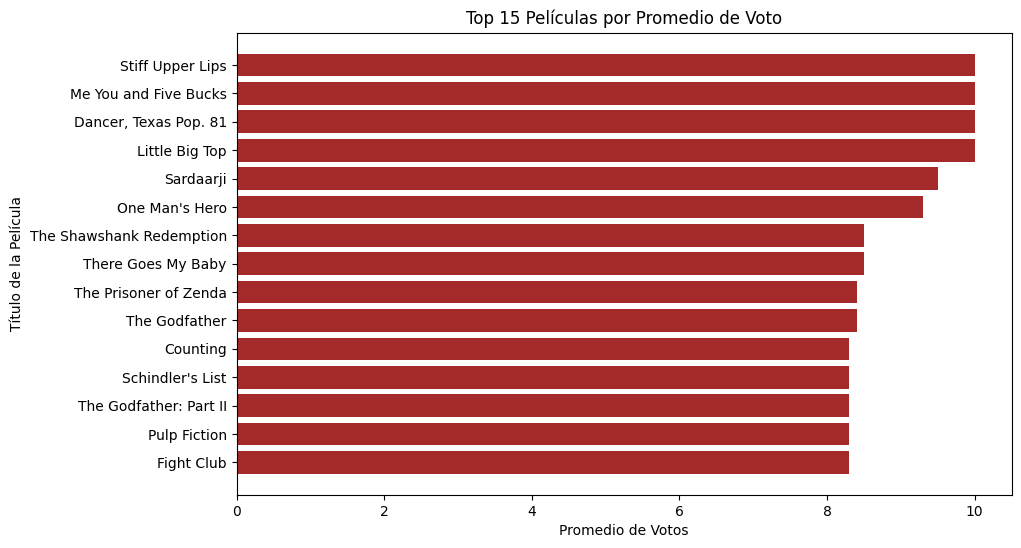

In [57]:

#Gráfico del Histograma de Datos
# Ordenamos el DataFrame por la columna 'popularity' en orden descendente.
df_sorted = data.sort_values(by='vote_average', ascending=False)

# Seleccionamos las top 10 películas más populares. 
# En este ejemplo usamos solo 3 para simplificar, pero el método es escalable.
top_avrg_movies = df_sorted.head(15)

# Crear un gráfico de barras con los títulos de las películas en el eje x y la popularidad en el eje y.
plt.figure(figsize=(10, 6))
plt.barh(top_avrg_movies['original_title'], top_avrg_movies['vote_average'], color='brown')
plt.xlabel('Promedio de Votos')
plt.ylabel('Título de la Película')
plt.title('Top 15 Películas por Promedio de Voto')
plt.gca().invert_yaxis()  # Invertir el eje y para que la película más popular esté arriba
plt.show()

In [58]:
print(data["runtime"])


id
5          98.0
11        121.0
12        100.0
13        142.0
14        122.0
          ...  
417859     90.0
426067     94.0
426469    102.0
433715     90.0
447027     88.0
Name: runtime, Length: 4800, dtype: float64


In [59]:
data.dtypes

budget                           int64
genres                          object
homepage                        object
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
nombre_generos                  object
genre_names                     object
year                             int32
company_names                   object
dtype: object

In [60]:
data['release_date']

id
5        1995-12-09
11       1977-05-25
12       2003-05-30
13       1994-07-06
14       1999-09-15
            ...    
417859   2011-10-28
426067   1990-01-01
426469   2017-02-03
433715   2014-06-15
447027   2015-10-27
Name: release_date, Length: 4800, dtype: datetime64[ns]